# Introdução ao módulo Basemap

Matplotlib Basemap Toolkit é uma biblioteca para plotagem de mapas em Python.

> [Documentação](http://matplotlib.org/basemap/index.html)

In [1]:
# importando pacotes e módulos necessários
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

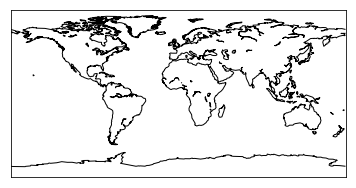

In [2]:
# Criando um mapa com matplotlib
mapa = Basemap() # Classe basemap  - padrão Plate Carrée projection centrado nas coordenadas [0,0]
mapa.drawcoastlines() # Desenha as coastlines
plt.show()

/usr/lib64/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


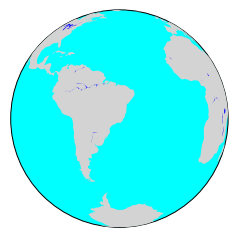

In [4]:
# Criando um mapa com parâmetros definidos
mapa = Basemap(projection='ortho', lat_0=-20.7549, lon_0=-42.8786)
mapa.drawmapboundary(fill_color='aqua')
mapa.fillcontinents(color='lightgrey',lake_color='blue')

plt.show()

In [5]:
help(Basemap)

Help on class Basemap in module mpl_toolkits.basemap:

class Basemap(builtins.object)
 |  Methods defined here:
 |  
 |  __call__(self, x, y, inverse=False)
 |      Calling a Basemap class instance with the arguments lon, lat will
 |      convert lon/lat (in degrees) to x/y map projection
 |      coordinates (in meters).  If optional keyword ``inverse`` is
 |      True (default is False), the inverse transformation from x/y
 |      to lon/lat is performed.
 |      
 |      For cylindrical equidistant projection (``cyl``), this
 |      does nothing (i.e. x,y == lon,lat).
 |      
 |      For non-cylindrical projections, the inverse transformation
 |      always returns longitudes between -180 and 180 degrees. For
 |      cylindrical projections (self.projection == ``cyl``,
 |      ``cea``, ``mill``, ``gall`` or ``merc``)
 |      the inverse transformation will return longitudes between
 |      self.llcrnrlon and self.llcrnrlat.
 |      
 |      Input arguments lon, lat can be either sca

/usr/lib64/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


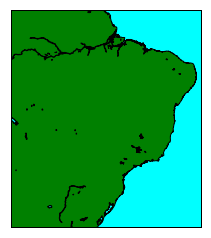

In [6]:
# Criando mapa com parâmetros definidos
mapa = Basemap(llcrnrlon=-70,llcrnrlat=-34,urcrnrlon=-34,urcrnrlat=5,
resolution='i', projection='merc', lat_0 = -42, lon_0 = -20)
mapa.drawmapboundary(fill_color='aqua')
mapa.fillcontinents(color='green',lake_color='aqua')
mapa.drawcoastlines()
plt.show()

## Trabalhando com arquivos netCDF

In [7]:
# importando pacotes e módulos necessários
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

/usr/lib64/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib64/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


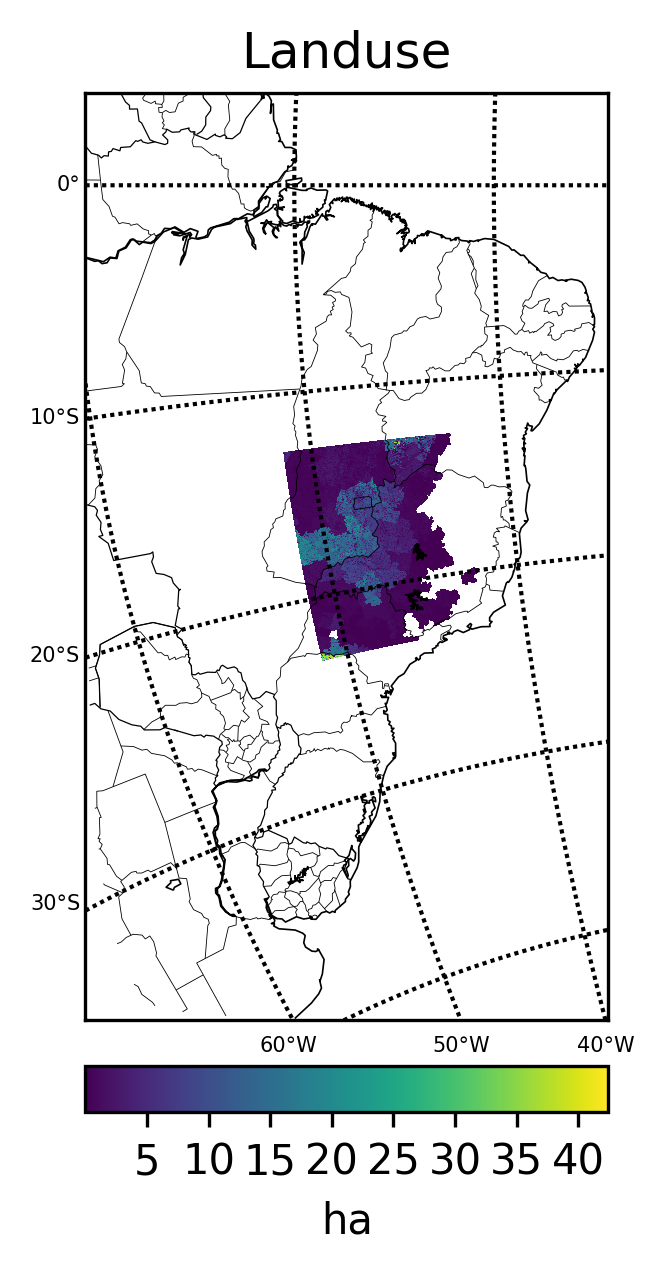

In [8]:
# Lendo arquivo netCDF e armazenando algumas variáveis e atributos
lucultsoja2012 = 'files/LUCULTSOJA2012.nc'
lu = Dataset(lucultsoja2012, mode='r')
lons = lu.variables['lon'][:]
lats = lu.variables['lat'][:]
landuse = lu.variables['landuse'][:][:]
landuse_units = lu.variables['landuse'].units
lu.close()

# Define alguns parâmetros para o mapa e a figura
fig=plt.figure(figsize=(8,4.5), dpi=300)
mapa = Basemap(llcrnrlon=-70,llcrnrlat=-34,urcrnrlon=-34,urcrnrlat=5, \
               resolution='l',projection='tmerc',lat_0=-42,lon_0=-20)

# Cria um grid retangular para as coordenadas
lon, lat = np.meshgrid(lons, lats)
xi, yi = mapa(lon, lat)

# Mascara os dados com valor igual a zero
landuse = np.ma.masked_where(landuse == 0, landuse)

# Cria a paleta de cores
cs = mapa.pcolor(xi,yi,np.squeeze(landuse), linewidths=1.)

# Define plotagem de paralellos, meridianos de divisões políticas
mapa.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=5)
mapa.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=5)
mapa.drawcoastlines(linewidth=0.4)
mapa.drawcountries(linewidth=0.3)
mapa.drawstates(linewidth=0.2)

cbar = mapa.colorbar(cs, location="bottom", pad="5%")
cbar.set_label(landuse_units)

plt.title("Landuse")

plt.show()